In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [54]:
data= pd.read_csv("Social_Network_Ads.csv")

In [55]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [56]:
x= data[["Age", "EstimatedSalary"]]
y= data["Purchased"]

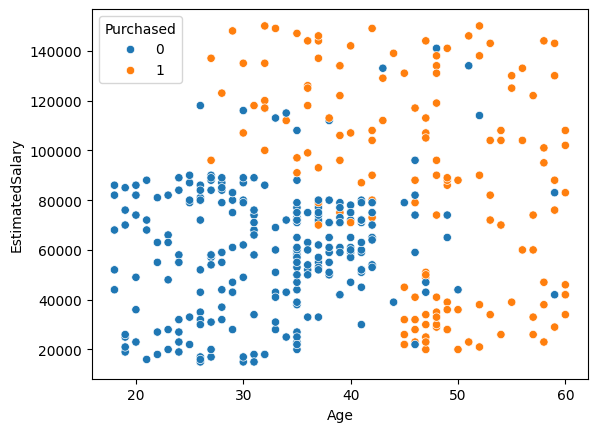

In [57]:
sns.scatterplot(x= "Age", y= "EstimatedSalary", data= data, hue= "Purchased")
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
sc= StandardScaler()
sc.fit(x)
x= pd.DataFrame(sc.transform(x), columns= x.columns)

In [60]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
dt.score(x_test, y_test)*100

83.75

In [66]:
dt.predict([[35, 20000]])

C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [67]:
from sklearn.tree import plot_tree

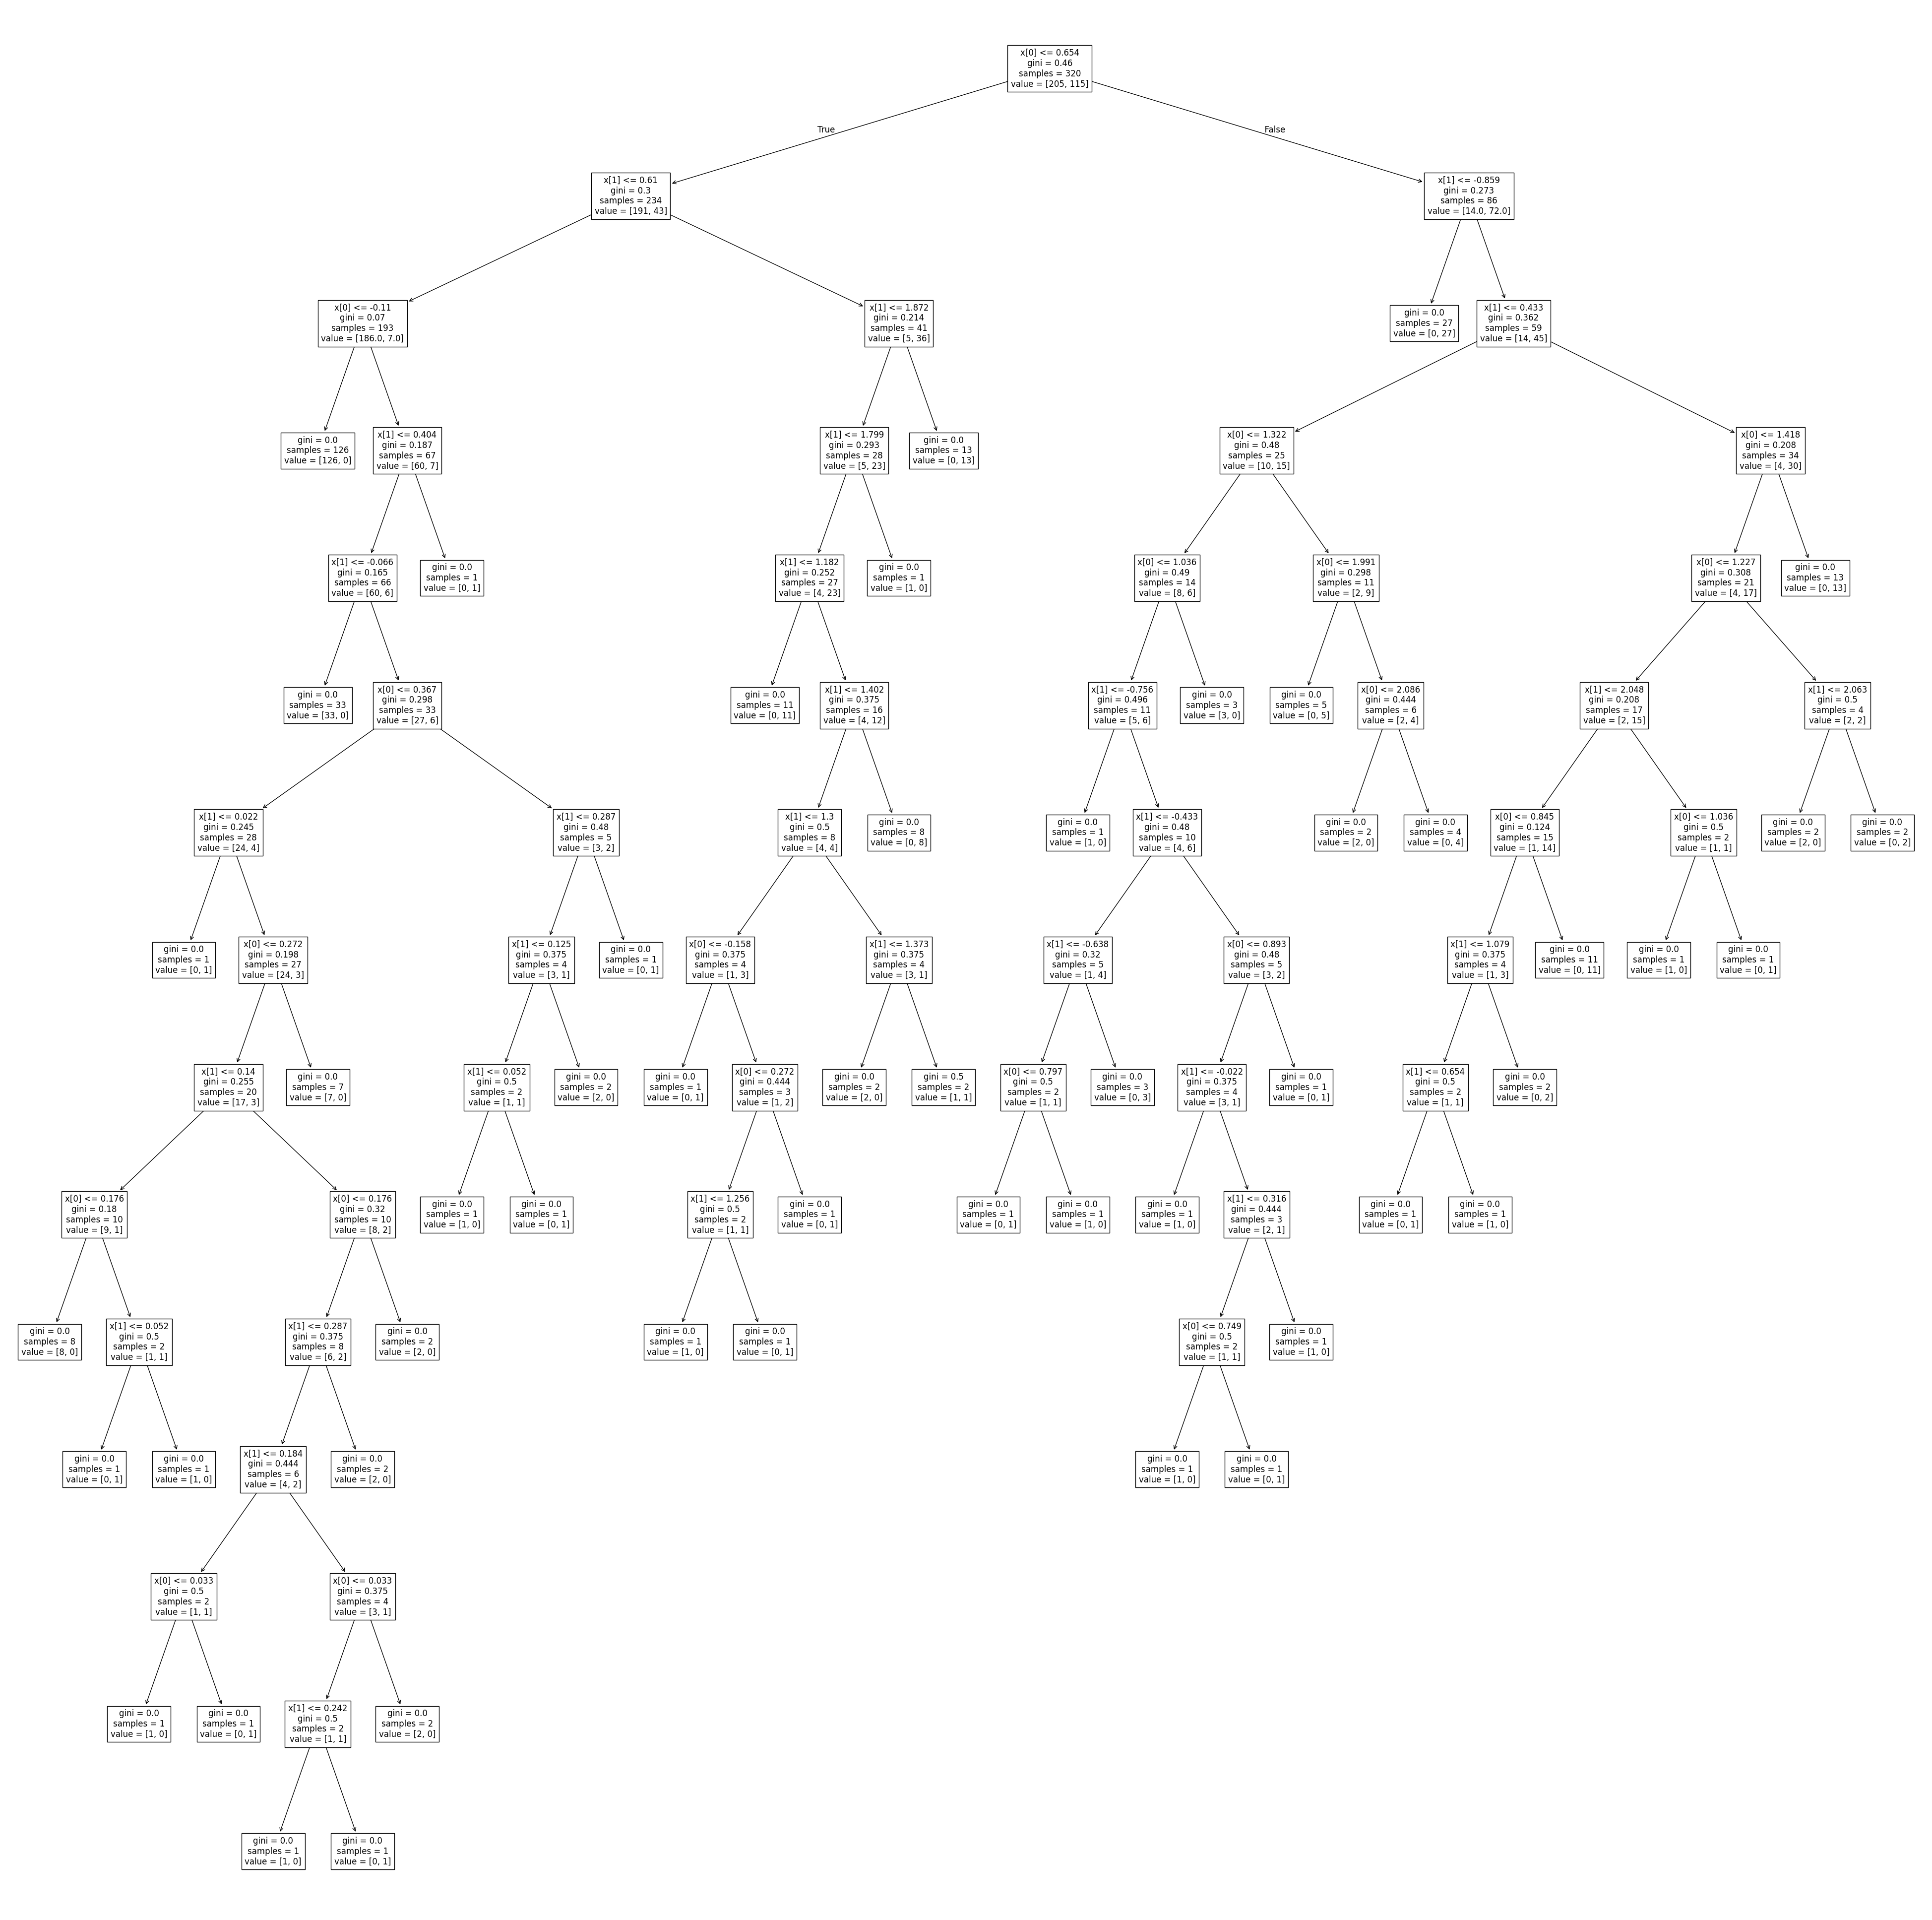

In [68]:
plt.figure(figsize= (50,50))
plot_tree(dt)
plt.savefig("decision_tree1.jpg")
plt.show()

In [69]:
# by entropy 

In [70]:
dt2= DecisionTreeClassifier(criterion= "entropy")
dt2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [71]:
dt2.score(x_test, y_test)*100

83.75

In [72]:
from mlxtend.plotting import plot_decision_regions

C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


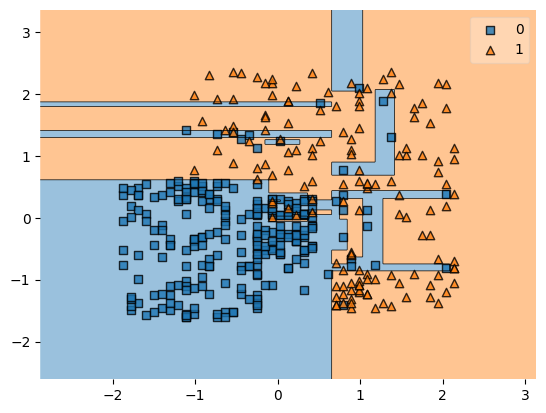

In [73]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf= dt2)
plt.show()

In [74]:
# perform pre pruning and then check training and testing accuracy

In [75]:
dt3= DecisionTreeClassifier(max_depth= 5)
dt3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [76]:
dt3.score(x_test, y_test)*100

90.0

In [77]:
dt3.score(x_train, y_train)*100

93.4375

In [78]:
# pre-pruning- if training time is a concern 

In [79]:
from sklearn.tree import plot_tree

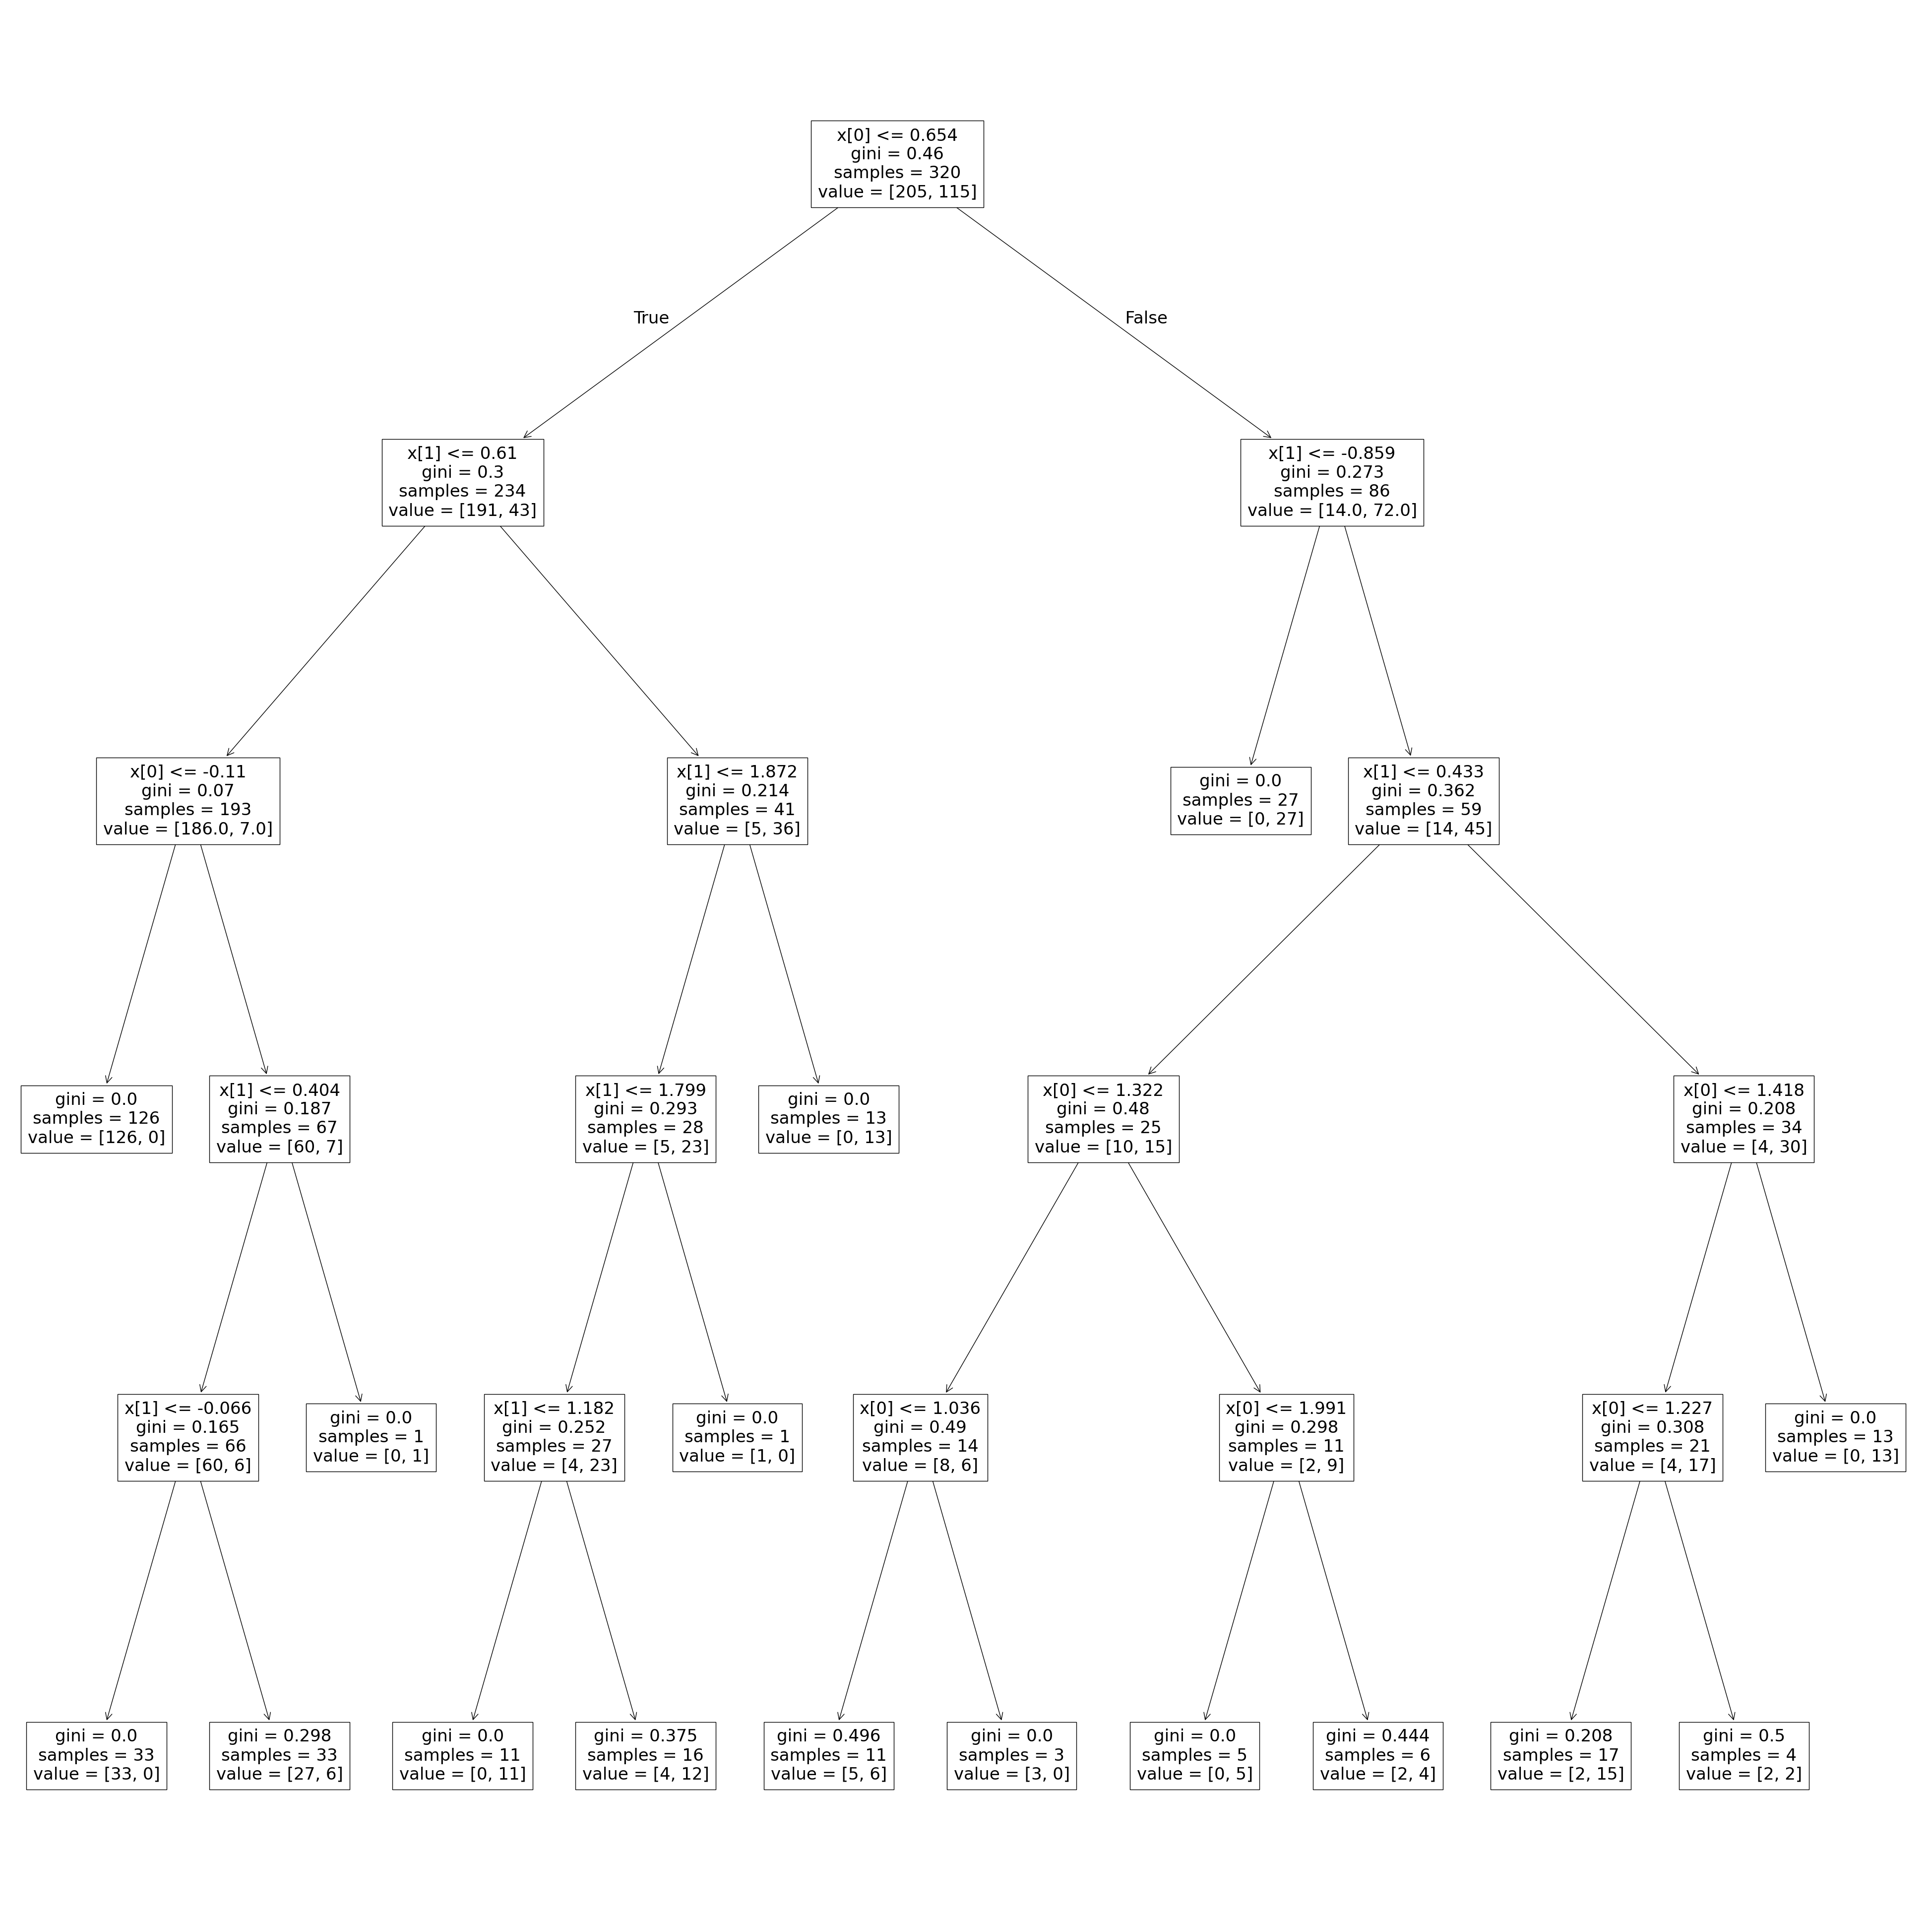

In [80]:
plt.figure(figsize= (50,50))
plot_tree(dt3)
plt.savefig("decision_tree3.jpg")
plt.show()

C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


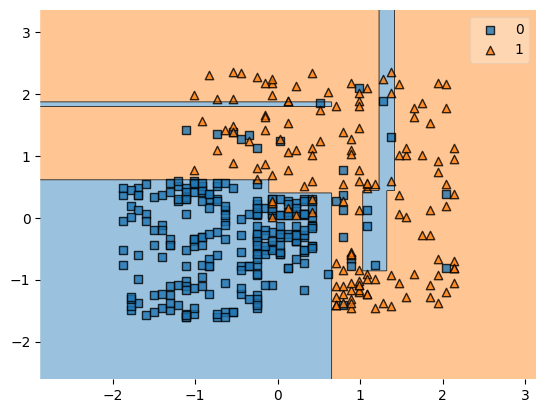

In [81]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf= dt3)
plt.show()

In [82]:
# post pruning

In [83]:
# make for loop

In [84]:
for i in range(1, 20):
    dt4= DecisionTreeClassifier(max_depth= i)
    dt4.fit(x_train, y_train)
    print(dt4.score(x_test, y_test), dt4.score(x_train, y_train), i)

0.9 0.821875 1
0.9125 0.91875 2
0.9125 0.91875 3
0.9125 0.93125 4
0.9 0.934375 5
0.8625 0.95 6
0.85 0.96875 7
0.85 0.975 8
0.85 0.98125 9
0.85 0.984375 10
0.8375 0.990625 11
0.8375 0.99375 12
0.8375 0.996875 13
0.8375 0.996875 14
0.8375 0.996875 15
0.8375 0.996875 16
0.8375 0.996875 17
0.8375 0.996875 18
0.8375 0.996875 19


In [85]:
# choose the depth with equal accuracy of training and testing both 

In [86]:
dt5= DecisionTreeClassifier(max_depth = 3)
dt5.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

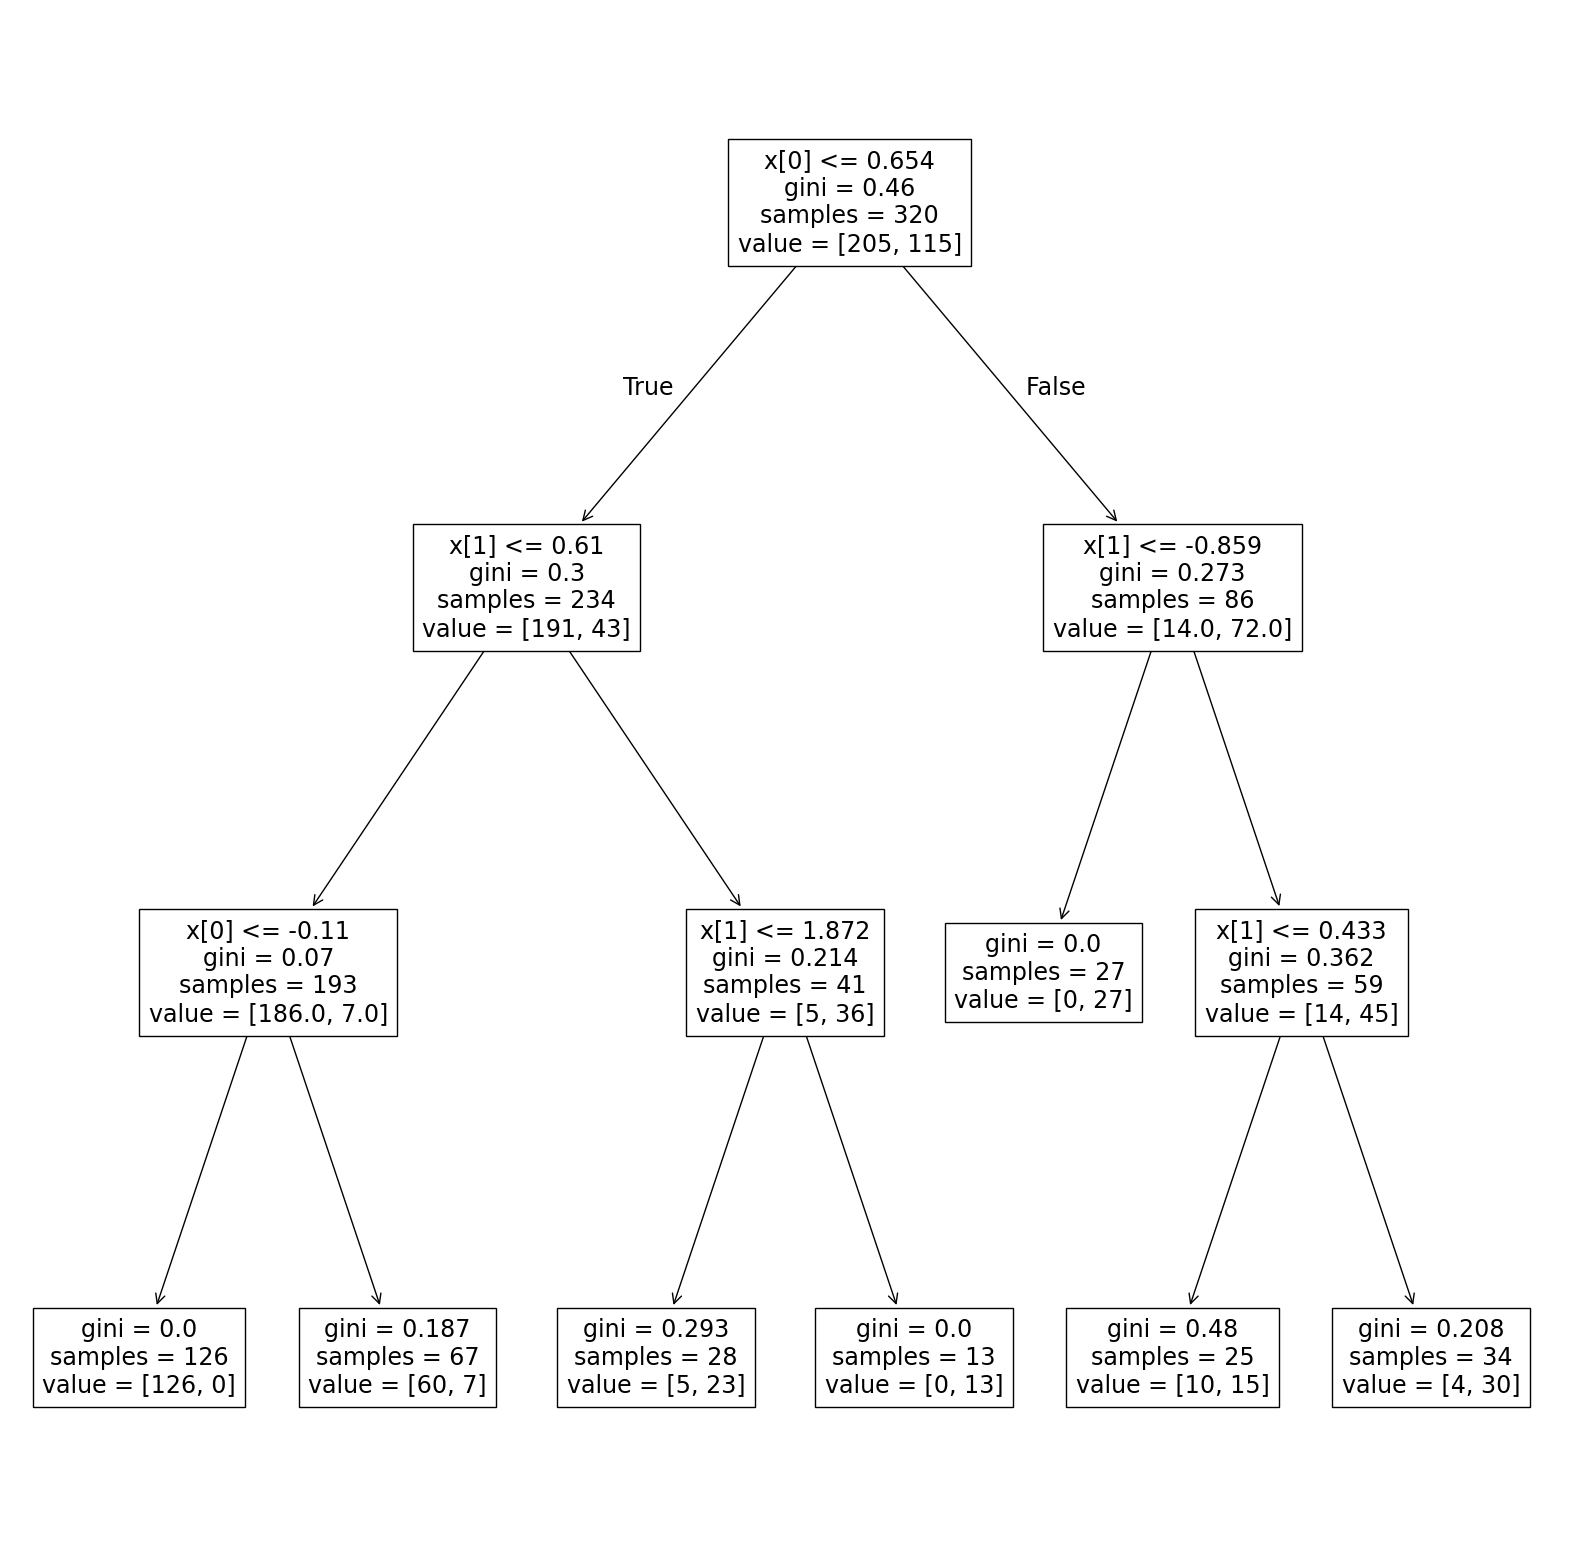

In [87]:
from sklearn.tree import plot_tree
plt.figure(figsize= (20,20))
plot_tree(dt5)
plt.savefig("decision_tree5.jpg")
plt.show()

C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


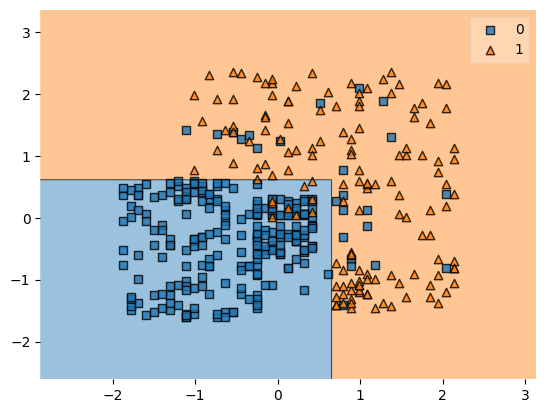

In [88]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf= dt5)
plt.show()

In [89]:
# better now